### GATIN Juliette – LANNELONGUE Vincent

# Projet numérique : câble sous-marin

## Questions théoriques

**1.** Dans l'énoncé du problème, on choisit d'approcher l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles:
$$L^\star=\sum_{k=1}^K l_{(k)}.$$ 
Pour cela, on se place dans le câdre d'application de la loi forte des grands nombres.  Celle-ci montre que pour un très grand nombre d'expériences, la moyenne des résultats tend vers l'espérance de la variable.

**2.** Loi conditionnelle du vecteur des composantes de $Z$ correspondant aux points de discrétisation sans observation, connaissant les valeurs prises par les composantes aux sites d'observation :

Posons $J = \{j_{1}, \dots, j_{n}\}$, ensemble des points de discrétisation aux sites d'observation.

On souhaite exprimer $f_{Y|X=x}$, la densité conditionnelle de $Y = (Z(x_{i}))_{i \in \{0, \dots, N\} \backslash J}$ (vecteur des composantes de $Z$ aux points de discrétisation sans observation) sachant $X = (X(x_{j_1}),\dots,X(x_{j_n}))=(z(x_{j_1}),\dots, z(x_{j_n})) = x $ ie les valeurs prises par les composantes aux sites d'observation. 

On a vu au chapitre II de probabilités que la densité du vecteur $Z$ s'écrit pour $z\in \mathbb{R_{-}}^N$ : $$f_Z(z) = \frac{1}{(2\pi)^{N/2}\sqrt{\det (C)}}\exp \left(-\frac{1}{2}(z-\mu)^t C^{-1}(z-\mu)\right)$$

D'après le cours de probabilités IV sur les vecteurs Gaussiens à densité, on a que $f_Z = f_{Y|X=x} f_X,$ où $f_X$ est la densité marginale de $X$. On cherche donc à décomposer $f_Z$ de la sorte. On note $\mu = (\mu_Y,\mu_X)$ et on remarque que $C$ peut se décomposer en blocs qui à réordonner/réindicer les indices :

$C =\begin{pmatrix}
   C_Y & C_{Y,X}\\
  C_{X,Y} & C_X  \\ 
 \end{pmatrix}$
où $C_Y = Cov(Y,Y)$, $C_X = Cov(X,X)$ et $C_{Y,X} = Cov(Y,X)$. 

Grâce au complément de Schur, on peut exprimer l'inverse de $C$, $C^{-1}$ et, en réarrangeant les termes de la forme quadratique dans $f_Z$ et on en déduit ainsi que :

$$f_{Y|X=x}(y) = \frac{1}{(2\pi)^{N/2}\sqrt{\det (CS_Y)}}\exp \left(-\frac{1}{2}\left(y - \psi(x)\right)^t CS_Y^{-1}\left(y - \psi(x))\right)\right)$$

C'est-à-dire que la **variable aléatoire $Y|X=x$ est gaussienne d'espérance $\mu_{Y|X=x} = \psi(x) = \mu_Y + C_{Y,X}C_X^{-1}(x-\mu_X)$ et de matrice de covariance $CS_Y = C_Y - C_{Y,X}C_X^{-1}C_{X,Y}$**. Autrement dit, l'espérance conditionnelle de $Y$ sachant $X$ est la variable aléatoire $\mathbb{E}(Y|X) = \psi(X) =(\mu_Y + C_{Y,X}C_X^{-1}(X-\mu_X))$. On notera que la covariance conditionnelle donnée par $CS_Y$ ne dépend pas de la valeur prise par $X$.

**3.** Considérons $Y=(Y_1,\dots,Y_p)$, un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1.  Cherchons la loi du vecteur $Z=m+RY$ où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ : 



Par définition, toute combinaison linéaire de vecteurs gaussiens est un vecteur gaussien. Donc, comme $Y = (Y_1,\dots,Y_p)$ de composantes gaussiennes, $Z = m + RY$ est gaussien.

Calculons son espérance et sa matrice de covariance :

$\mathbb{E}(Z) = \mathbb{E}(m+RY) = m+R\mathbb{E}(Y)$ or $\forall i, \mathbb{E}(Y_{i})=0$ d'où $\mathbb{E}(Z) = m$.

Calculons le coefficient $Cz_{i,j}$ de la matrice de covariance $Cz$ avec $i, j \in \{1, \dots, p\}$

Notons $m=(m_{1}, \dots, m_{p})$ et $[R]_{i,j} = r_{ij}$, on a :

$$Cz_{i,j} = Cov(m_{i}+(RY)_{i}, m_{j}+(RY)_{j})$$
$$ = \mathbb{E}((m_{i}+(RY)_{i}) - \mathbb{E}(m_{i}+(RY)_{i}))((m_{j}+(RY)_{j}) - \mathbb{E}(m_{j}+(RY)_{j})))$$
$$ = \mathbb{E}((\displaystyle\sum_{k=1}^{p} r_{i,k}Y_{k} - \displaystyle\sum_{k=1}^{p} r_{i,k} \mathbb{E}(Y_{k}))(\displaystyle\sum_{k=1}^{p} r_{j,k}Y_{k} - \displaystyle\sum_{k=1}^{p} r_{j,k} \mathbb{E}(Y_{k})))$$

Or, $\forall k \in \{1, \dots, p \} : \mathbb{E}(Y_{k})=0$

Ainsi, $$Cz_{i,j} = \mathbb{E}((\displaystyle\sum_{k=1}^{p} r_{i,k}Y_{k})(\displaystyle\sum_{k=1}^{p} r_{j,k}Y_{k}))$$
$$ = \mathbb{E}(\displaystyle\sum_{1\leq l,k \leq p} r_{i,k}r_{j,l}Y_{k}Y_{l})$$
$$ = \displaystyle\sum_{1\leq l,k \leq p} r_{i,k}r_{j,l}\mathbb{E}(Y_{k}Y_{l})$$

Or, calculons le coefficient de $Cy_{i,j}$ de la matrice de covariance de Y : 

$$Cy_{i,j}= Cov(Y_{i}, Y_{j}) = \mathbb{E}((Y_{i}-\mathbb{E}(Y_{i}))(Y_{j}-\mathbb{E}(Y_{j}))) = \mathbb{E}(Y_{i}Y_{j})$$

Mais, en sachant que  $\forall i, j \in \{1, \dots, p \} : Y_{i}$ et $Y_{j}$ sont indépendantes, on a :

$$Cy_{i,j}= Cov(Y_{i}, Y_{j}) = \delta{ij} $$

i.e. : $Cy = Id_{p}$ .

D'où : $Cz_{i,j} =  \displaystyle\sum_{1\leq l,k \leq p} r_{i,k}r_{j,l}Cy_{k,l} = (RCyR^{t})_{i,j} = (RR^{t})_{i,j}$

Ainsi, $Cz = RR^{t}$ et, comme chaque composante de $Z$ est gaussienne, comme combinaison linéaire de composantes gaussiennes, on peut appliquer un principe de linéarité :

$$ Z=m+RY \sim \mathcal{N}(m,RR^{t}) $$

**4.** Pour effectuer une simulation conditionnelle, on se propose donc de simuler des lois normales simples, ici les gaussiennes $\mathbf{Y}=(Y_1,\dots,Y_p)$ telles que décrites précédemment et on choisit $m$ et $R$ afin d'obtenir l'espérance $m$ et la matrice de covariance $C$ souhaitées pour $Z$.

A partir de là j'essaye un truc ^^

Pour effectuer une simulation conditionnelle, on se propose donc de simuler des lois normales simples. Soit $\mathbf{W}=(W_1,\dots,W_{N-n})$ un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1. A partir de ces simulations, on peut simuler le vecteur $Y|X$ tel que décrit en question 2 (i.e. le vecteur des composantes de $Z$ aux points de discrétisation sans observation, sachant les composantes connues) grâce à la question 3.

On doit choisir $m$ et $R$ afin d'avoir $Y = m + RW \sim \mathcal{N}(\mathbb{E}(Y|X),CSy)$.

## Implémentation

### Préambule

***Chargement de dépendances***

In [2]:
import numpy as np
import matplotlib.pyplot as plt

***Discrétisation***

In [3]:
A = 0
B = 500
N = 101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta

***Paramètres du modèle***

In [4]:
mu = -5
a = 50
sigma2 = 12

***Données***

In [5]:
observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

***Indices des composantes correspondant aux observations et aux componsantes non observées***


In [6]:
unknown_indexes = list(set(discretization_indexes)-set(observation_indexes))

### Questions

**1.** Fonction qui prend en argument la distance entre les points (ici, matrice de distances), le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points (ici, matrice de covariance) :

In [7]:
# Correspond à la fonction C(h) donnée dans l'énoncé
def cov(dist_H, a, sigma_carre):
    return sigma_carre * np.exp(-dist_H/a)

**2.** Calcul de la matrice de distance $H$, correspondant à la distance entre chaque point : 

In [8]:
H = np.array([[Delta*abs(i-j) for i in range(N)] for j in range (N)])

**3.** Calcul de la matrice de covariance du vecteur $Z=(Z(x_0),\dots,Z(x_N))$ :

In [9]:
cov_Z = cov(H, a, sigma2)

**4.** Extraction des 3 matrices de covariance suivantes :

 - entre les observations : il suffit d'extraire les éléments d'indices dans la liste observations_indexes. Il s'agit de $C_{X}$ (cf. question théorique 2).

In [10]:
cov_X = np.array([[cov_Z[i, j] for i in observation_indexes] for j in observation_indexes])

- entre les observations et les inconnues: il s'agit de $C_{X,Y}$ (ou $C_{Y,X}$).

In [17]:
cov_YX = np.array([[cov_Z[i, j] for i in observation_indexes] for j in unknown_indexes])
cov_XY = np.transpose(cov_YX)

- entre les inconnues : on extrait que les éléments d'indices de la liste observations_indexes. Il s'agit de $C_{Y}$.

In [12]:
cov_Y = np.array([[cov_Z[i, j] for i in unknown_indexes] for j in unknown_indexes])

**5.** Calcul de l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données : 

D'après la partie Questions théoriques, question 2 et avec les mêmes notations, on a : 
$\mathbb{E}(Y|X) = (\mu_Y + C_{Y,X}C_X^{-1}(X-\mu_X))$
Dans notre code, on a $C_X$ = cov_X et $C_{Y,X}$ = cov_YX. D'où:


In [18]:
mu_x = np.array([mu for i in observation_indexes])
mu_y = np.array([mu for i in unknown_indexes])
def Eyx(X):
    return mu_y + (cov_YX.dot(np.linalg.inv(cov_X))).dot(X - mu_x)

E_YX = Eyx(depth)

**6.** Calcul de la matrice de variance conditionnelle et tracée de sa diagonale en fonction de la position :

D'après la partie Questions théoriques, question 2, on a : $CS_Y = C_Y - C_{Y,X}C_X^{-1}C_{X,Y}$ la matrice de covariance de la variable aléatoire $Y|X=x$. 

In [28]:
cov_cond = cov_Y - (cov_YX.dot(np.linalg.inv(cov_X))).dot(cov_XY)

Traçons maintenant sa diagonale en fonction de la position.

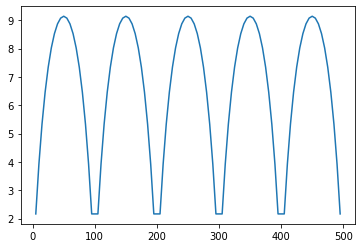

In [41]:
position = np.array(unknown_indexes)*Delta
diagonale = np.array([cov_cond[i,i] for i in range (len(cov_cond))])
plt.plot(position, diagonale)
plt.show()

***Commentaires :***

On remarque logiquement que la variance augmente avec la distance à un point dont la profondeur est connue. Cela vient bien sûr de la fonction C(h) : plus 2 points sont proches, plus ils ont tendance à avoir des profondeurs proches. 

Ainsi, le point adjacent (point 1) à une valeur connue (point 0) ne peut que peu s'en éloigner vers le haut ou le bas (en terme de profondeur). Le point suivant (point 2) s'éloigne peu du point 1, mais sa variance est plus grande, puisqu'on cumule potentiellement 2 éloignements (point 1 + point 2) dans le même sens. Et ainsi de suite, on obtient bien une variance maximale pour le point au milieu de 2 points connus, c'est-à-dire le point le plus éloigné d'une valeur connue.

**7.** Pour une simulation conditionnelle : 

On doit d'abord simuler une variable suivant une loi normale centrée

In [ ]:
#Simulation 

In [15]:
#Figure: simulation, données et espérance conditionnelle

***Commentaires :***

**8.** Fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs $depth$ et du pas de discrétisation $Delta$ : 

In [16]:
def long_cable(depth, Delta) :
    S = 0
    for i in range(len(depth)-1):
        S += np.sqrt(Delta**2 + (depth[i+1] - depth[i])**2)
    return S

**9.** Calcul de la longueur du câble à partir de 100 simulations:

***Comparaison entre l’espérance conditionnelle (estimée) de la longueur avec la longueur de l’espérance conditionnelle :***

**10.** Représentation de la la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations:

In [ ]:
#Figure

***Commentaires :***

**11.** Histogramme des longueurs de câbles générées:

In [17]:
#Figure

**12.** Intervalle de confiance à 95% de la longueur du câble :

***Méthode 1 :***

***Méthode 2 :***

**13.** Estimation de la probabilité que la longueur du câble dépasse 525 mètres:

**14.** 

- Pour 1 000 simulations :

- Pour 10 000 simulations :

- Pour 100 000 simulations :

***Commentaires :***